In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions   ##!!!!
from statistics import mean, stdev
import time
from math import ceil

# data partition
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# oversampling
from imblearn.over_sampling import RandomOverSampler  #### !!! 
from imblearn.over_sampling import SMOTE  #### !!! 

# Kfold
from sklearn.model_selection import StratifiedKFold

# scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [169]:
# open the train dataset
df = pd.read_csv('../../techscape-ecommerce/train.csv')
df.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [170]:
# set the index as the Access_ID
df.set_index('Access_ID', inplace = True)
df.head(3)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        9999 non-null   object 
 1   AccountMng_Pages            9999 non-null   int64  
 2   AccountMng_Duration         9999 non-null   float64
 3   FAQ_Pages                   9999 non-null   int64  
 4   FAQ_Duration                9999 non-null   float64
 5   Product_Pages               9999 non-null   int64  
 6   Product_Duration            9999 non-null   float64
 7   GoogleAnalytics_BounceRate  9999 non-null   float64
 8   GoogleAnalytics_ExitRate    9999 non-null   float64
 9   GoogleAnalytics_PageValue   9999 non-null   float64
 10  OS                          9999 non-null   object 
 11  Browser                     9999 non-null   int64  
 12  Country                     9999 non-null   object 
 13  Type_of_Traffic     

In [172]:
# data types transformation
# Converting Date type from object to datetime
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.0,0.0000,1.0000,4.00000,27.0000
AccountMng_Duration,9999.0,81.205854,179.715545,0.0,0.0000,7.5000,92.20835,3398.7500
FAQ_Pages,9999.0,0.508051,1.279390,0.0,0.0000,0.0000,0.00000,24.0000
FAQ_Duration,9999.0,34.559101,139.796989,0.0,0.0000,0.0000,0.00000,2549.3750
Product_Pages,9999.0,31.685869,44.550277,0.0,7.0000,18.0000,38.00000,705.0000
Product_Duration,9999.0,1199.769430,1958.276304,0.0,183.5625,599.0000,1470.27080,63973.5222
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.0,0.0000,0.0032,0.01680,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.0,0.0143,0.0251,0.05000,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.0,0.0000,0.0000,0.00000,361.7637
Browser,9999.0,2.352535,1.715698,1.0,2.0000,2.0000,2.00000,13.0000


#### Observations:
- the dataset don't have null values
- it has outliers in some features - need to explore and solve them
- it has 9.999 observations and 15 features (9 numerical and 6 categorical)
- the dependent variable is 'Buy'

## Split into train and val dataset
- all the preprocessing steps will be do into the train dataset

In [174]:
X = df.drop('Buy', axis=1)
y = df['Buy']

In [175]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [176]:
X_train.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor'],
      dtype='object')

In [177]:
# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = X_train.columns.drop(non_metric_features).to_list()

In [178]:
non_metric_features

['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']

In [179]:
metric_features

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue']

## Preprocessing

- Outliers

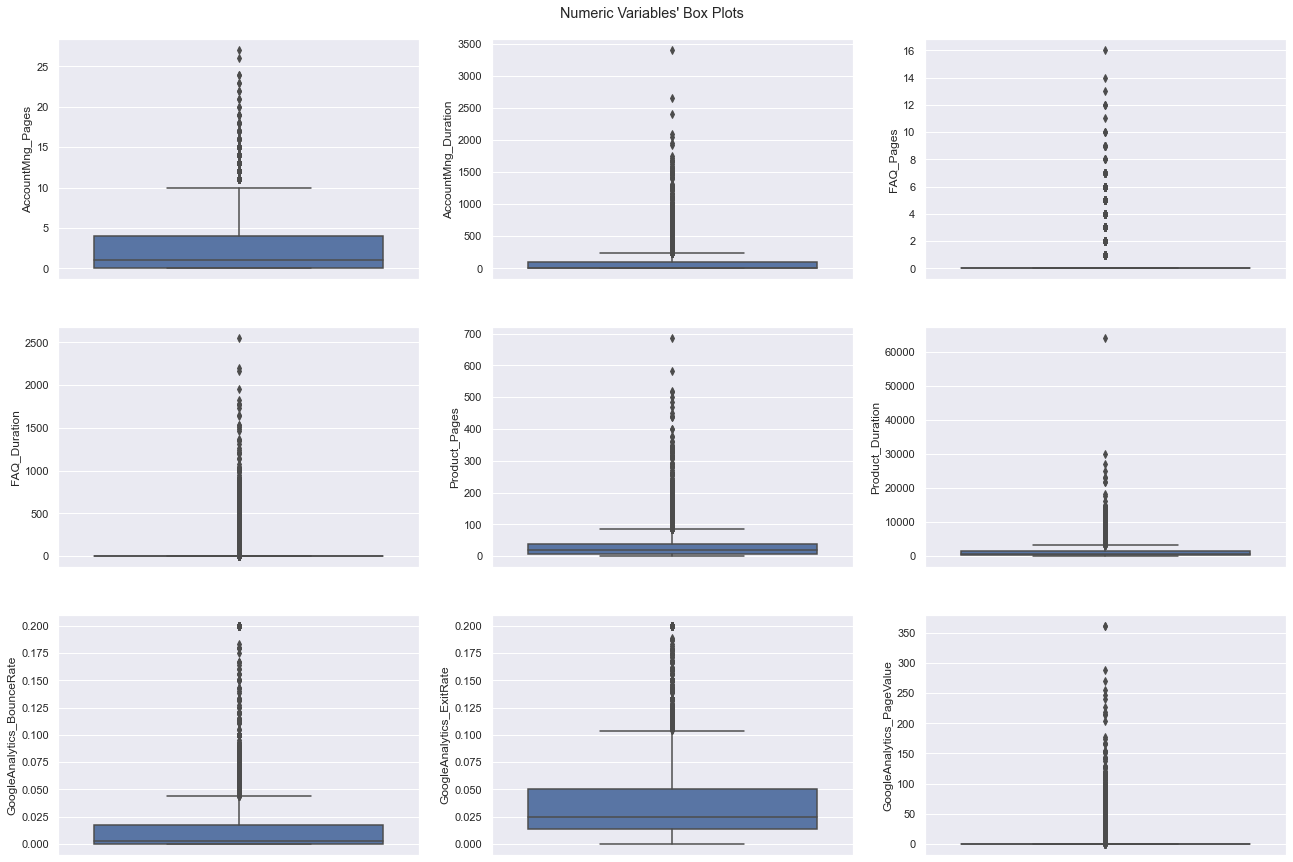

In [180]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], ax=ax)
    #ax.set_title(feat, y=-0.16)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

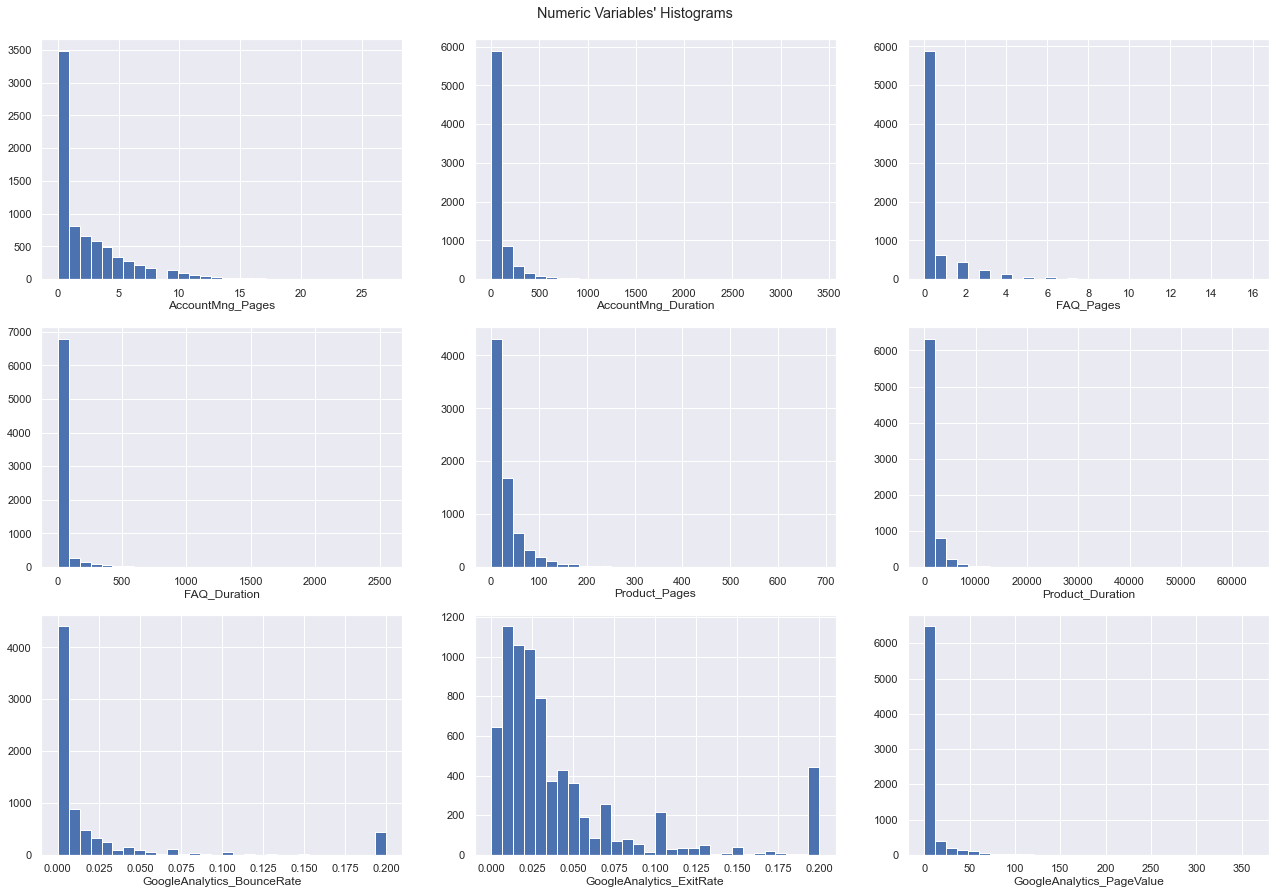

In [181]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(X_train[feat], bins=30)
    ax.set_title(feat, y=-0.15)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

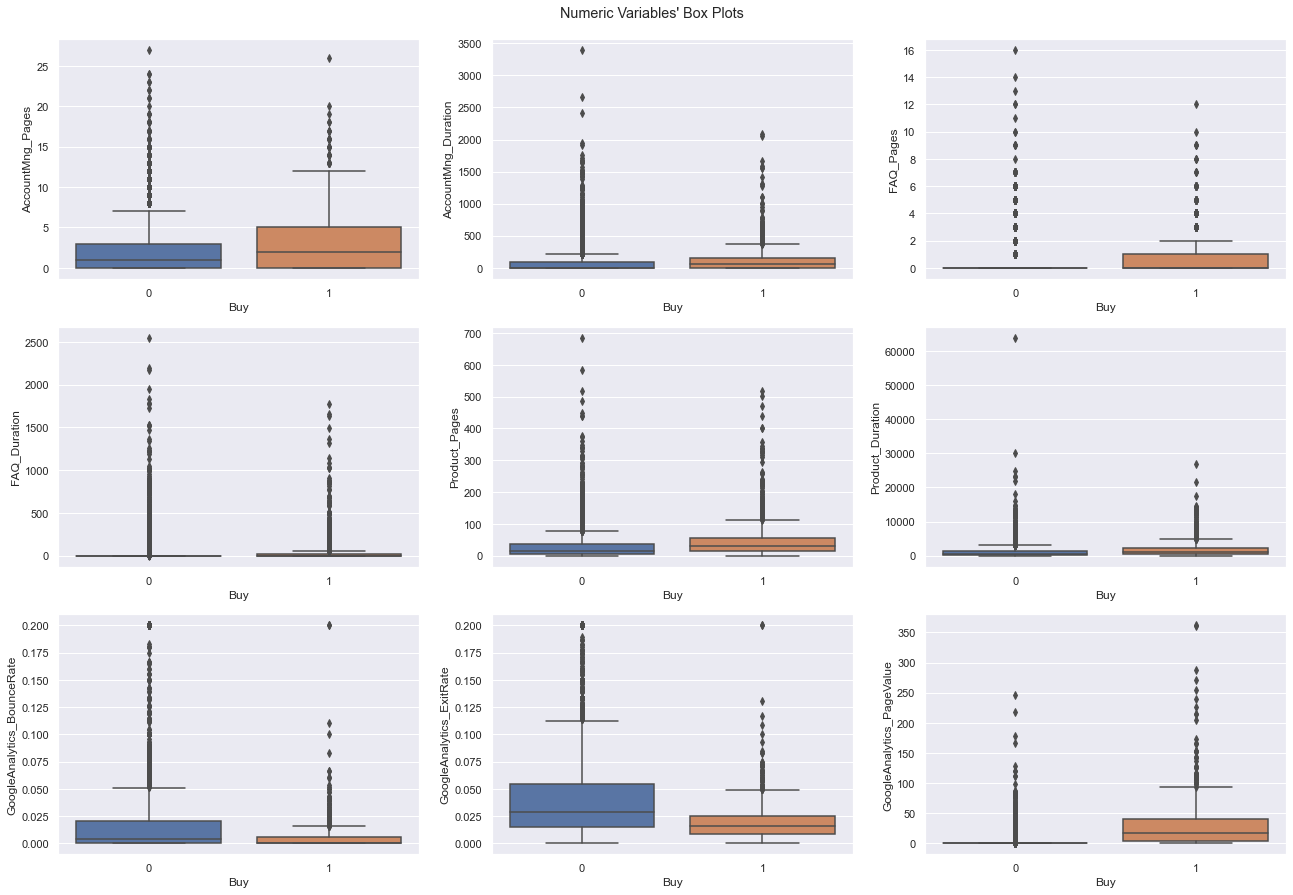

In [182]:
# All Numeric Variables' Box Plots in one figure - with the dependent variable
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=X_train[feat], x=y_train, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

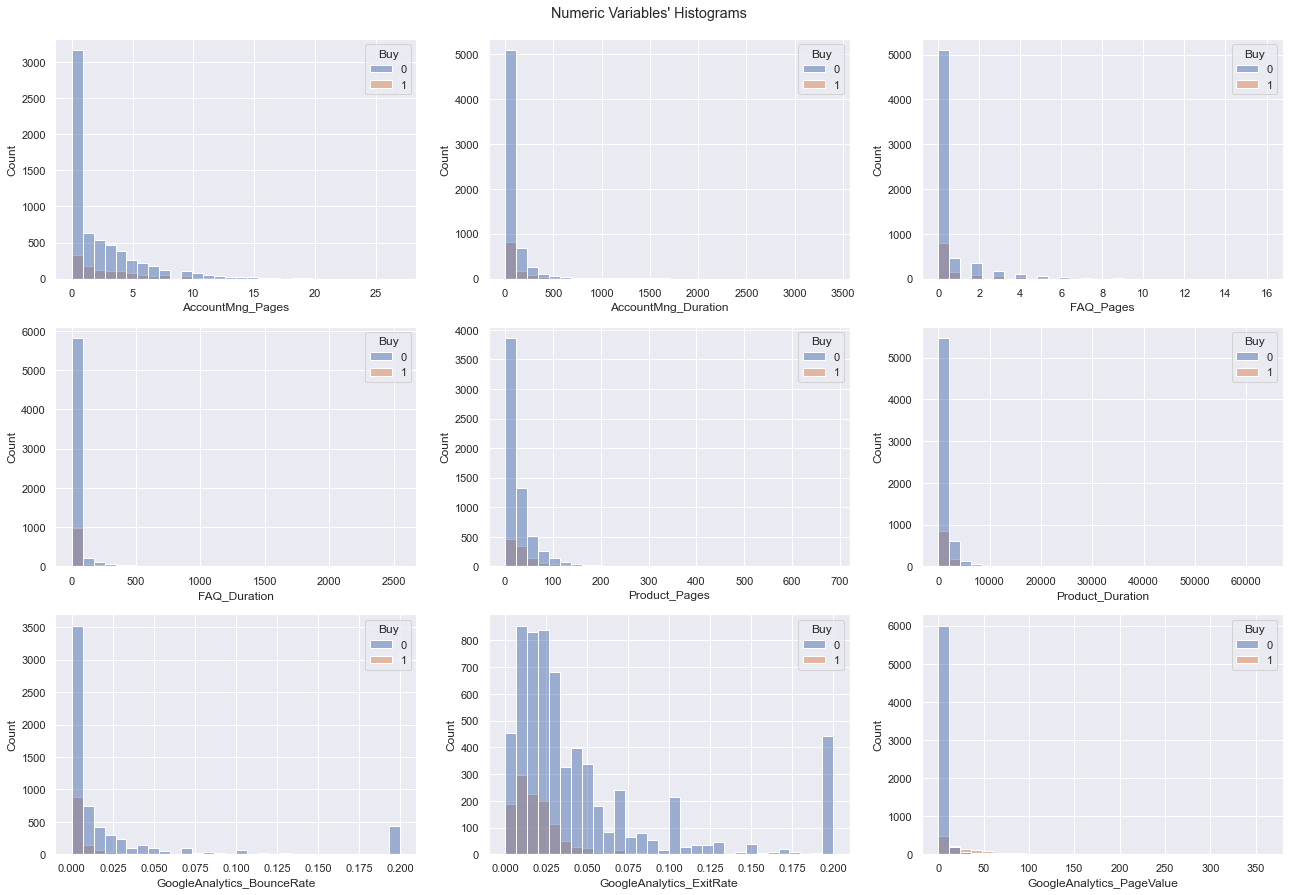

In [183]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(22, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(data=X_train, x=feat, hue=y_train, ax=ax, bins=30)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, y=0.91)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

Observations:
- the dataset has outliers in all of the numeric features
- the data is right skewed in all of the numeric features, there is a lot of zero values in all features except in 'GoogleAnalytics_ExitRate'
- the distribution of the observations that didn't buy the products is very similar to those that bought the product. This means that it can be difficult to the model to learn the differences of these two groups

In [184]:
# Define trashold for outliers - conservative method

filters1 = (
    (X_train['AccountMng_Duration']<=2000)
    &
    (X_train['FAQ_Duration']<=2000)
    &
    (X_train['Product_Pages']<=650)
    &
    (X_train['Product_Duration']<=50000)
    &
    (X_train['GoogleAnalytics_PageValue']<=350)
)

train_concat = pd.concat([X_train, y_train], axis=1)

df_1 = train_concat[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / train_concat.shape[0], 4))

train_concat = train_concat[filters1]

Percentage of data kept after removing outliers: 0.9987


## Iryna's added

In [185]:
from datetime import datetime

def convert_date(date):
    converted = datetime.strptime(date, "%d-%b-%y")
    today = pd.to_datetime("2021-01-01")
    return (today-converted).days

In [186]:
X_train["Mng"] = X_train.AccountMng_Duration/X_train.AccountMng_Pages
X_train["FAQ"] = X_train.FAQ_Duration/X_train.FAQ_Pages
X_train["Product"] = X_train.Product_Duration/X_train.Product_Pages
X_train.fillna(0, inplace=True)

X_train['time_not_visited'] = X_train['Date'].apply(convert_date)

In [187]:
X_train.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Mng,FAQ,Product,time_not_visited
Access_ID,,,,,,,,,,,,,,,,,,,
708079592,6-Nov-20,3,47.0000,0,0.0000,89,3436.9750,0.000,0.0044,0.0,Windows,2,Spain,2,New_Access,15.666667,0.0000,38.617697,56
426312699,26-Mar-20,2,136.6667,1,9.5000,20,1572.5714,0.000,0.0159,0.0,MacOSX,2,Spain,1,Returner,68.333350,9.5000,78.628570,281
156527868,24-Nov-20,0,0.0000,0,0.0000,33,2861.9667,0.000,0.0344,0.0,Windows,2,United Kingdom,2,Returner,0.000000,0.0000,86.726264,38
414839270,7-Nov-20,1,0.0000,1,80.1667,29,759.7500,0.000,0.0194,0.0,Windows,2,Portugal,2,Returner,0.000000,80.1667,26.198276,55
569787208,26-May-20,0,0.0000,0,0.0000,25,710.5000,0.032,0.0840,0.0,Windows,2,Other,13,Returner,0.000000,0.0000,28.420000,220


## Feature Selection

- Correlation

In [204]:
# define the fuction for correlation's heatmap 
def cor_heatmap(cor, ax):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', ax=ax)
    plt.show()

In [205]:
all_train_num = X_train.join(y_train)

# Define metric and non-metric features
non_metric_features = ['Date', 'OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor']
metric_features = all_train_num.columns.drop(non_metric_features).to_list()

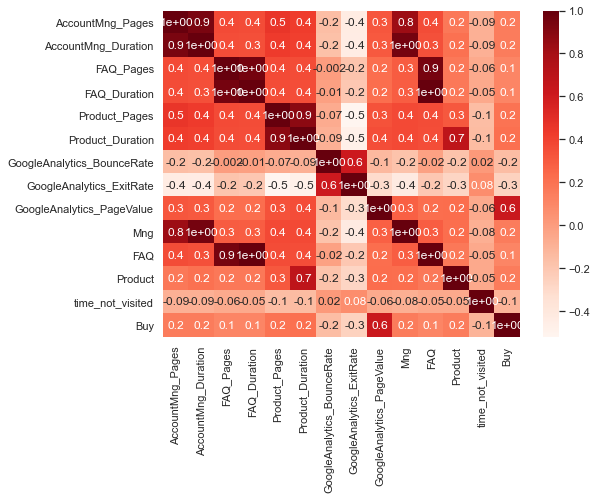

<Figure size 864x720 with 0 Axes>

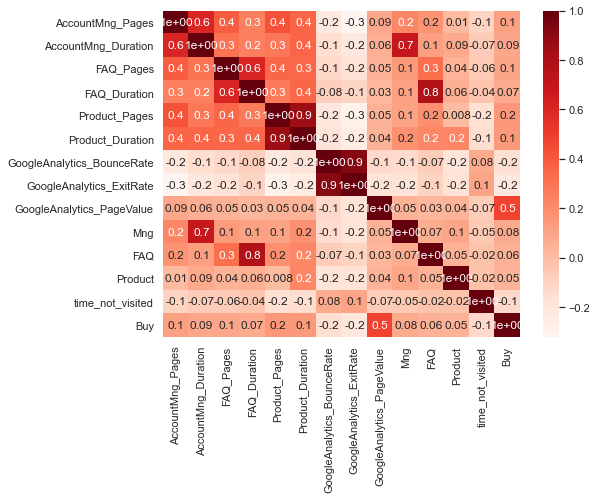

<Figure size 864x720 with 0 Axes>

In [206]:
#build correlation matrix
# method - pearson - feature and target/ linear relation
cor_pearson = all_train_num[metric_features].corr(method='pearson')

# method - spearman - rank correlation, ordering/ not linear relation
cor_spearman = all_train_num[metric_features].corr(method ='spearman')

# plot the correlations
fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_spearman, ax1)

fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_pearson, ax1)

Observations:
- Features highly correlated (keep only one):
    - __'AccountMng_Pages'__ and __'AccountMng_Duration'__ (Number of pages visited and total amount of time spent by the user - account management related pages)
    - __'FAQ_Pages'__ and __'FAQ_Duration'__ (Number of pages visited and total amount of time spent by the user - FAQ related pages)
    - __'Product_Pages'__ and __'Product_Duration'__ (Number of pages visited and total amount of time spent by the user - Product related pages)
    - __'GoogleAnalytics_BounceRate'__ and __'GoogleAnalytics_ExitRate'__ (Bounce and exit rate, both explains the the exit rate of the pages visited by the user)

In [207]:
all_train_num.head(2)

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Mng,FAQ,Product,time_not_visited,Buy
Access_ID,,,,,,,,,,,,,,,,,,,,
708079592,6-Nov-20,3,47.0000,0,0.0,89,3436.9750,0.0,0.0044,0.0,Windows,2,Spain,2,New_Access,15.666667,0.0,38.617697,56,1
426312699,26-Mar-20,2,136.6667,1,9.5,20,1572.5714,0.0,0.0159,0.0,MacOSX,2,Spain,1,Returner,68.333350,9.5,78.628570,281,0


In [208]:
all_train_num[metric_features].head(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Mng,FAQ,Product,time_not_visited,Buy
Access_ID,,,,,,,,,,,,,,
708079592,3,47.0000,0,0.0,89,3436.9750,0.0,0.0044,0.0,15.666667,0.0,38.617697,56,1
426312699,2,136.6667,1,9.5,20,1572.5714,0.0,0.0159,0.0,68.333350,9.5,78.628570,281,0


In [209]:
X_poly = all_train_num[metric_features]
X_poly.drop(["Mng","FAQ", "Product", "Buy"], axis = 1, inplace = True)

In [210]:
X_poly

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,time_not_visited
Access_ID,,,,,,,,,,
708079592,3,47.0000,0,0.0000,89,3436.9750,0.0000,0.0044,0.0000,56
426312699,2,136.6667,1,9.5000,20,1572.5714,0.0000,0.0159,0.0000,281
156527868,0,0.0000,0,0.0000,33,2861.9667,0.0000,0.0344,0.0000,38
414839270,1,0.0000,1,80.1667,29,759.7500,0.0000,0.0194,0.0000,55
569787208,0,0.0000,0,0.0000,25,710.5000,0.0320,0.0840,0.0000,220
...,...,...,...,...,...,...,...,...,...,...
177520994,0,0.0000,0,0.0000,19,283.5000,0.0000,0.0105,0.0000,240
599953664,1,9.5000,0,0.0000,25,674.2500,0.0000,0.0173,0.0000,284
209148521,0,0.0000,0,0.0000,21,1296.7167,0.0000,0.0070,70.0183,242


In [211]:
for index, row in X_train.iterrows():
    
    traffic = row['Type_of_Traffic']
    if (traffic==2)or(traffic==5)or(traffic==7)or(traffic==8)or(traffic==10)or(traffic==11)or(traffic==15):
        X_poly.at[index,'is_Traffic_quality'] = 1
    else:
        X_poly.at[index,'is_Traffic_quality'] = 0

In [212]:
X_poly.head(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,time_not_visited,is_Traffic_quality
Access_ID,,,,,,,,,,,
708079592,3,47.0000,0,0.0,89,3436.9750,0.0,0.0044,0.0,56,1.0
426312699,2,136.6667,1,9.5,20,1572.5714,0.0,0.0159,0.0,281,0.0


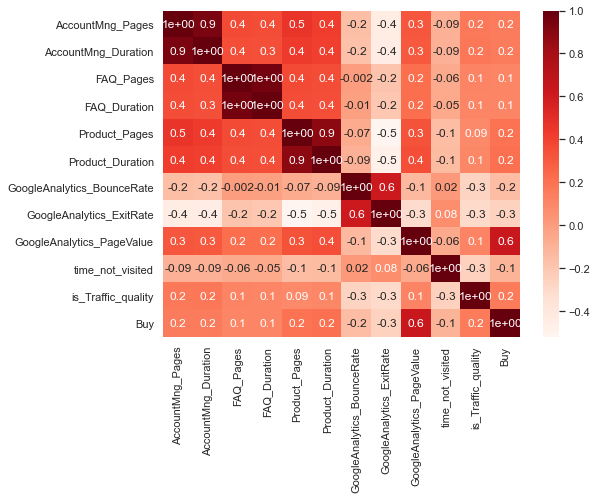

<Figure size 864x720 with 0 Axes>

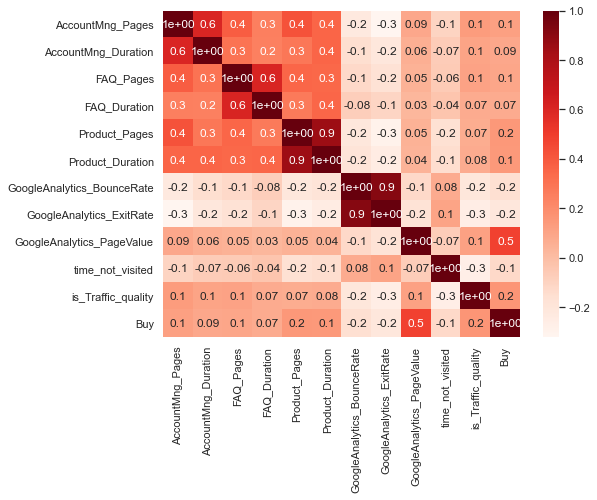

<Figure size 864x720 with 0 Axes>

In [213]:
all_train_num = X_poly.join(y_train)

#build correlation matrix
# method - pearson - feature and target/ linear relation
cor_pearson = all_train_num.corr(method='pearson')

# method - spearman - rank correlation, ordering/ not linear relation
cor_spearman = all_train_num.corr(method ='spearman')

# plot the correlations
fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_spearman, ax1)

fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_pearson, ax1)

In [214]:
X_train_final = X_poly.drop(['AccountMng_Duration', 'FAQ_Duration', 'Product_Duration', 'GoogleAnalytics_BounceRate'],
                           axis = 1)
X_train_final.head(2)

,AccountMng_Pages,FAQ_Pages,Product_Pages,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,time_not_visited,is_Traffic_quality
Access_ID,,,,,,,
708079592,3,0,89,0.0044,0.0,56,1.0
426312699,2,1,20,0.0159,0.0,281,0.0


In [215]:
# Splitting the dataset into the Training set and Test set
X_tr, X_te, y_tr, y_te = train_test_split(X_train_final, y_train, test_size = 0.3, random_state = 10, stratify=y_train)

In [225]:
clf = RandomForestClassifier(n_estimators=100, random_state=50, max_leaf_nodes = 50)
clf.fit(X_tr, y_tr)

RandomForestClassifier(max_leaf_nodes=50, random_state=50)

In [226]:
# Predicting the Test set results
y_pred = clf.predict(X_te)

# Making the Confusion Matrix
cm = confusion_matrix(y_te, y_pred)
cm

array([[1831,   70],
       [ 139,  210]])

In [227]:
f1 = f1_score(y_te, y_pred)
f1

0.6677265500794912

In [228]:
### MODEL 2 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)

y_pred = lr_model.predict(X_te)

f1 = f1_score(y_te, y_pred)
f1

0.508411214953271